In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import OLSInfluence as influence
from patsy import dmatrices
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import itertools

In [9]:
diamonds = pd.read_csv('diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
diamonds = diamonds[['carat','cut','color','clarity','depth','table','price','x','y','z']]

In [11]:
diamonds.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [12]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# EDA

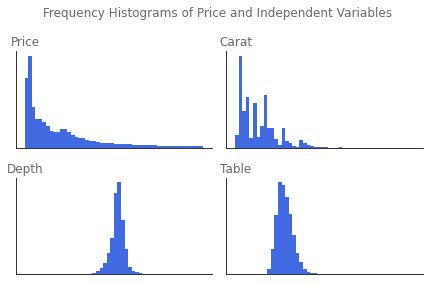

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2)
idx = [[0,0], [0,1], [1,0], [1,1]]
for i, var in zip(idx, ['price', 'carat', 'depth', 'table']):
    ax = axes[i[0], i[1]]
    ax.hist(diamonds[var], bins=50, color='royalblue')
    ax.set_title(var[0].upper() + var[1:], color='dimgray', x=0.05)
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
fig.suptitle('Frequency Histograms of Price and Independent Variables', color='dimgray')

fig.tight_layout()

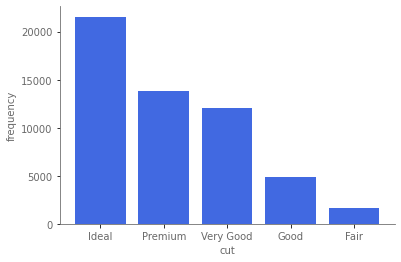

In [14]:
fig, ax = plt.subplots()
#ax.set_title('Frequency of diamonds by cut categories')
ax.bar(range(5), diamonds['cut'].value_counts(), color='royalblue')
plt.xticks(range(5), diamonds['cut'].value_counts().index, color='dimgray')
plt.yticks(color='dimgray')
ax.set_ylabel('frequency', color='dimgray')
ax.set_xlabel('cut', color='dimgray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('dimgray')
ax.spines['bottom'].set_color('dimgray')
plt.show()

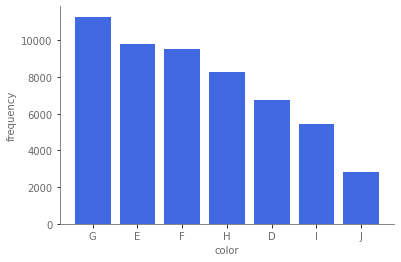

In [15]:
fig, ax = plt.subplots()
#ax.set_title('Frequency of diamonds by color categories')
ax.bar(range(7), diamonds['color'].value_counts(), color='royalblue')
plt.xticks(range(7), diamonds['color'].value_counts().index, color='dimgray')
plt.yticks(color='dimgray')
ax.set_ylabel('frequency', color='dimgray')
ax.set_xlabel('color', color='dimgray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('dimgray')
ax.spines['bottom'].set_color('dimgray')
plt.show()

In [16]:
idx = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
clarity_counts = diamonds['clarity'].value_counts().reindex(index = idx)
clarity_counts

I1        741
SI2      9194
SI1     13065
VS2     12258
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
Name: clarity, dtype: int64

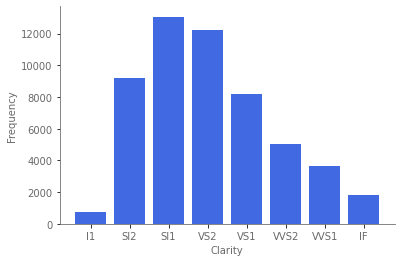

In [17]:
fig, ax = plt.subplots()
#ax.set_title('Frequency of diamonds by clarity categories')
idx = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
clarity_counts = diamonds['clarity'].value_counts().reindex(index = idx)
ax.bar(range(8),clarity_counts, color='royalblue')
plt.xticks(range(8), clarity_counts.index, color='dimgray')
plt.yticks(color='dimgray')
ax.set_ylabel('Frequency', color='dimgray')
ax.set_xlabel('Clarity', color='dimgray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('dimgray')
ax.spines['bottom'].set_color('dimgray')
plt.show()

In [18]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


- There aren't any Null values

In [19]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [20]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [21]:
diamonds.loc[((diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0))]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [22]:
diamonds = diamonds.drop(diamonds.loc[((diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0))].index)

In [23]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [24]:
diamonds.shape

(53920, 10)

# MULTICOLLINEARITY DETECTION

<AxesSubplot:>

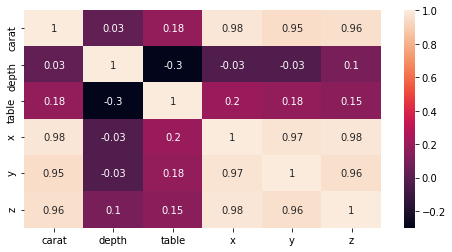

In [25]:
correlation_matrix = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']].corr().round(2)
plt.figure(figsize = (8,4))
sns.heatmap(data=correlation_matrix, annot=True)

In [26]:
y, X = dmatrices('price~carat + cut + color + clarity + depth + table + x + y + z', data=diamonds, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

     VIF Factor          features
0   7265.854181         Intercept
1      3.941991       cut[T.Good]
2     11.315818      cut[T.Ideal]
3      8.351944    cut[T.Premium]
4      7.638678  cut[T.Very Good]
5      2.010003        color[T.E]
6      2.013356        color[T.F]
7      2.193843        color[T.G]
8      1.951132        color[T.H]
9      1.710593        color[T.I]
10     1.423803        color[T.J]
11     3.537884     clarity[T.IF]
12    14.819307    clarity[T.SI1]
13    11.505744    clarity[T.SI2]
14    10.812378    clarity[T.VS1]
15    14.316699    clarity[T.VS2]
16     5.951940   clarity[T.VVS1]
17     7.583532   clarity[T.VVS2]
18    25.391630             carat
19     1.873275             depth
20     1.787821             table
21    65.109687                 x
22    20.859591                 y
23    29.986743                 z


### Combine x,y,z as volume

In [27]:
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [28]:
y, X = dmatrices('price ~ carat + cut + color + clarity + depth + table + volume', data=diamonds, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

     VIF Factor          features
0   5678.154847         Intercept
1      3.935539       cut[T.Good]
2     11.298901      cut[T.Ideal]
3      8.344741    cut[T.Premium]
4      7.615369  cut[T.Very Good]
5      2.009950        color[T.E]
6      2.010496        color[T.F]
7      2.191863        color[T.G]
8      1.951155        color[T.H]
9      1.709017        color[T.I]
10     1.421490        color[T.J]
11     3.535387     clarity[T.IF]
12    14.782674    clarity[T.SI1]
13    11.483907    clarity[T.SI2]
14    10.802960    clarity[T.VS1]
15    14.302943    clarity[T.VS2]
16     5.948351   clarity[T.VVS1]
17     7.582588   clarity[T.VVS2]
18    24.117797             carat
19     1.390461             depth
20     1.793894             table
21    23.625935            volume


### Drop volume

In [29]:
y, X = dmatrices('price ~ carat + cut + color + clarity + depth + table', data=diamonds, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

     VIF Factor          features
0   5631.867832         Intercept
1      3.935287       cut[T.Good]
2     11.297792      cut[T.Ideal]
3      8.343244    cut[T.Premium]
4      7.614318  cut[T.Very Good]
5      2.009925        color[T.E]
6      2.010496        color[T.F]
7      2.191863        color[T.G]
8      1.951102        color[T.H]
9      1.709017        color[T.I]
10     1.421489        color[T.J]
11     3.535161     clarity[T.IF]
12    14.781430    clarity[T.SI1]
13    11.482603    clarity[T.SI2]
14    10.801663    clarity[T.VS1]
15    14.301788    clarity[T.VS2]
16     5.947925   clarity[T.VVS1]
17     7.581921   clarity[T.VVS2]
18     1.323011             carat
19     1.378386             depth
20     1.786599             table


### Drop clarity(?)

In [30]:
y, X = dmatrices('price ~ carat + cut + color + depth + table', data=diamonds, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

     VIF Factor          features
0   5504.843403         Intercept
1      3.867322       cut[T.Good]
2     11.049692      cut[T.Ideal]
3      8.177249    cut[T.Premium]
4      7.437503  cut[T.Very Good]
5      2.002412        color[T.E]
6      1.986955        color[T.F]
7      2.121276        color[T.G]
8      1.925980        color[T.H]
9      1.681249        color[T.I]
10     1.403367        color[T.J]
11     1.155040             carat
12     1.371129             depth
13     1.784266             table


# FIT THE MODEL

In [31]:
model = smf.ols('price ~ carat + cut + color + clarity + depth + table', data = diamonds).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 2.940e+04
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:02:16   Log-Likelihood:            -4.5676e+05
No. Observations:               53920   AIC:                         9.136e+05
Df Residuals:                   53899   BIC:                         9.138e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -4550.1351    373.471    -12.183      0.000   -5282.142   -3818.128
cut[T.Good]        614.5112     34.340     17.895      0.000     547.204     681.819
cut[T.Ideal]       877.5295     34.150     25.696      0.000     810.595     944.464
cut[T.Premium]     804.8578     32.956     24.422      0.000     740.264     869.452
cut[T.Very Good]   778.1744     32.935     23.628      0.000     713.622     842.727
color[T.E]        -209.7971     18.298    -11.466      0.000    -245.660    -173.934
color[T.F]        -303.0033     18.493    -16.385      0.000    -339.249    -266.757
color[T.G]        -504.9793     18.112    -27.881      0.000    -540.479    -469.480
color[T.H]        -977.4713     19.264    -50.741      0.000   -1015.229    -939.714
color[T.I]       -1436.7828     21.635    -66.411      0.000   -1479.187   -1394.379
color[T.J]       -2321.0674     26.705    -86.915      0.000   -2373.409   -2268.725
clarity[T.IF]     5402.7382     52.229    103.442      0.000    5300.368    5505.108
clarity[T.SI1]    3566.9690     44.656     79.876      0.000    3479.442    3654.496
clarity[T.SI2]    2618.9817     44.858     58.384      0.000    2531.060    2706.903
clarity[T.VS1]    4524.3645     45.616     99.183      0.000    4434.956    4613.773
clarity[T.VS2]    4209.1206     44.910     93.723      0.000    4121.096    4297.145
clarity[T.VVS1]   5058.6265     48.288    104.759      0.000    4963.981    5153.272
clarity[T.VVS2]   4956.0843     46.966    105.524      0.000    4864.030    5048.139
carat             8894.2215     12.082    736.176      0.000    8870.541    8917.902
depth              -21.1854      4.079     -5.193      0.000     -29.181     -13.190
table              -24.7011      2.978     -8.296      0.000     -30.537     -18.865
==============================================================================
Omnibus:                    15247.232   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           184942.712
Skew:                           1.016   Prob(JB):                         0.00
Kurtosis:                      11.843   Cond. No.                     6.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### We drop clarity from the model here to check if clarity will affect other predictors' significance

In [32]:
model = smf.ols('price ~ carat + cut + color + depth + table', data = diamonds).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                 2.815e+04
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:02:17   Log-Likelihood:            -4.6821e+05
No. Observations:               53920   AIC:                         9.365e+05
Df Residuals:                   53906   BIC:                         9.366e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2230.2646    456.578      4.885      0.000    1335.368    3125.161
cut[T.Good]       1021.4025     42.095     24.264      0.000     938.896    1103.910
cut[T.Ideal]      1558.5736     41.762     37.321      0.000    1476.720    1640.427
cut[T.Premium]    1272.9038     40.344     31.551      0.000    1193.829    1351.979
cut[T.Very Good]  1351.0929     40.250     33.568      0.000    1272.203    1429.983
color[T.E]         -89.4358     22.583     -3.960      0.000    -133.699     -45.172
color[T.F]         -72.9476     22.733     -3.209      0.001    -117.504     -28.391
color[T.G]        -102.0999     22.033     -4.634      0.000    -145.285     -58.915
color[T.H]        -727.8354     23.667    -30.753      0.000    -774.223    -681.448
color[T.I]       -1068.9400     26.534    -40.286      0.000   -1120.947   -1016.933
color[T.J]       -1900.3323     32.811    -57.918      0.000   -1964.642   -1836.023
carat             8199.6315     13.959    587.408      0.000    8172.272    8226.991
depth              -57.9178      5.031    -11.513      0.000     -67.778     -48.057
table              -38.9593      3.679    -10.588      0.000     -46.171     -31.748
==============================================================================
Omnibus:                    12909.223   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           164391.044
Skew:                           0.795   Prob(JB):                         0.00
Kurtosis:                      11.405   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Because the predictors are still significant even after dropping the clarity from the model, we can keep clarity predictor in our model. And there is no need to do pair-wise chi-square test from significance. We suspect that clarity just affect itself. That's why we see VIF for clarity is greater than 10. Because the se is inflated, so t stat is smaller and p value is larger. The p-value of t-test for clarity should be larger than reality.

# INFLUENTIAL POINT DETECTION

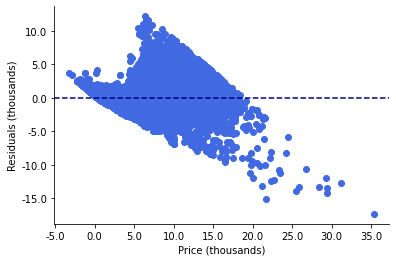

In [33]:
fig, ax = plt.subplots()
ax.scatter(model.fittedvalues, model.resid, color='royalblue')
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Price (thousands)')
ax.set_ylabel('Residuals (thousands)')
ax.axhline(0, linestyle='dashed', color='navy')
ax.set_xticks(np.linspace(-5000, 35000, num=9))
ax.set_xticklabels(np.linspace(-5, 35, num=9))
ax.set_yticks(np.linspace(-15000, 10000, num=6))
ax.set_yticklabels(np.linspace(-15, 10, num=6))
plt.show()

In [34]:
n = diamonds.shape[0]
p = 21

In [35]:
! pip install yellowbrick

     |████████████████████████████████| 269 kB 13.4 MB/s 
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


/opt/venv/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


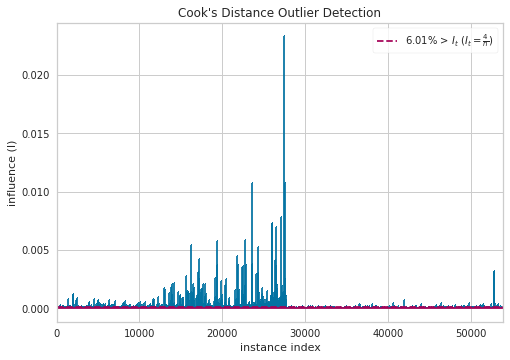

In [36]:
#https://www.scikit-yb.org/en/latest/api/regressor/influence.html
from yellowbrick.regressor import cooks_distance

fig, ax = plt.subplots()
ax = cooks_distance(
    X, np.squeeze(y),
    draw_threshold=True,
    linefmt="C0-", markerfmt=","
)

In [37]:
inf = influence(model)

# cooks_distance is an attribute of incluence, here C, not sure about P (p-value maybe?)
C, P = inf.cooks_distance
C

0        0.000001
1        0.000008
2        0.000029
3        0.000021
4        0.000121
           ...   
53935    0.000009
53936    0.000005
53937    0.000003
53938    0.000010
53939    0.000013
Length: 53920, dtype: float64

In [38]:
atyp_cook = np.abs(C) >= 4/len(diamonds)
print(diamonds.index[atyp_cook])

Int64Index([    4,     5,     8,    10,    11,    17,    18,    19,    23,
               24,
            ...
            52993, 53146, 53338, 53352, 53595, 53665, 53692, 53697, 53745,
            53879],
           dtype='int64', length=3241)


In [39]:
print(C[atyp_cook])

4        0.000121
5        0.000115
8        0.000186
10       0.000135
11       0.000094
           ...   
53665    0.000082
53692    0.000084
53697    0.000107
53745    0.000095
53879    0.000092
Length: 3241, dtype: float64


## Drop influential points

In [40]:
diamonds = diamonds.drop(diamonds.index[atyp_cook])
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,38.830870
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


In [41]:
model = smf.ols('price ~ carat + cut + color + clarity + depth + table', data = diamonds).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                 4.426e+04
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:02:22   Log-Likelihood:            -4.0877e+05
No. Observations:               50679   AIC:                         8.176e+05
Df Residuals:                   50658   BIC:                         8.178e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2526.4066    271.475     -9.306      0.000   -3058.501   -1994.312
cut[T.Good]        605.6169     26.005     23.289      0.000     554.647     656.586
cut[T.Ideal]       867.4036     25.986     33.379      0.000     816.470     918.337
cut[T.Premium]     791.9408     25.227     31.392      0.000     742.495     841.386
cut[T.Very Good]   755.0559     25.142     30.031      0.000     705.777     804.335
color[T.E]        -155.5698     12.532    -12.413      0.000    -180.133    -131.006
color[T.F]        -243.8454     12.722    -19.167      0.000    -268.781    -218.910
color[T.G]        -297.3599     12.468    -23.850      0.000    -321.797    -272.923
color[T.H]        -676.9780     13.258    -51.063      0.000    -702.963    -650.993
color[T.I]       -1065.5070     14.966    -71.195      0.000   -1094.841   -1036.173
color[T.J]       -1847.2439     18.890    -97.788      0.000   -1884.269   -1810.219
clarity[T.IF]     2794.4869     46.706     59.831      0.000    2702.942    2886.031
clarity[T.SI1]    1568.8220     42.795     36.659      0.000    1484.943    1652.701
clarity[T.SI2]     869.1782     43.056     20.187      0.000     784.788     953.568
clarity[T.VS1]    2315.8400     43.223     53.579      0.000    2231.123    2400.557
clarity[T.VS2]    2070.2809     42.886     48.274      0.000    1986.223    2154.338
clarity[T.VVS1]   2673.4313     44.478     60.107      0.000    2586.254    2760.609
clarity[T.VVS2]   2629.8046     43.883     59.928      0.000    2543.794    2715.815
carat             8265.5086      9.372    881.918      0.000    8247.139    8283.878
depth              -16.1775      2.969     -5.449      0.000     -21.996     -10.358
table              -25.4848      2.106    -12.101      0.000     -29.613     -21.357
==============================================================================
Omnibus:                     7451.739   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14197.363
Skew:                           0.929   Prob(JB):                         0.00
Kurtosis:                       4.808   Cond. No.                     6.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

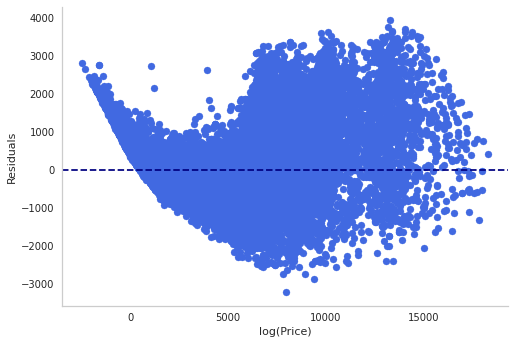

In [42]:
fig, ax = plt.subplots()
ax.scatter(model.fittedvalues, model.resid, color='royalblue')
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('log(Price)')
ax.set_ylabel('Residuals')
ax.axhline(0, linestyle='dashed', color='navy')
plt.show()

# HETEROSCADASTICITY

In [43]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 8191.292098430164, 'LM-Test p-value': 0.0}


- There's significant heteroscadasticity

### Ln transformation on Y

In [44]:
diamonds['log_price']=np.log(diamonds['price'])
diamonds.describe()

,carat,depth,table,price,x,y,z,volume,log_price
count,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000
mean,0.750480,61.745188,57.408731,3440.330946,5.633394,5.638026,3.479483,122.305950,7.701170
std,0.428175,1.359166,2.190499,3311.466188,1.053710,1.079255,0.663176,71.254428,0.961246
min,0.200000,52.200000,43.000000,326.000000,3.730000,3.680000,1.070000,31.707984,5.786897
25%,0.390000,61.100000,56.000000,919.000000,4.680000,4.690000,2.890000,63.711469,6.823286
50%,0.700000,61.800000,57.000000,2218.000000,5.620000,5.620000,3.460000,111.640176,7.704361
75%,1.010000,62.500000,59.000000,4840.000000,6.450000,6.450000,4.000000,165.258240,8.484670
max,2.740000,73.600000,79.000000,18766.000000,9.050000,58.900000,31.800000,3840.598060,9.839802


In [45]:
model_1 = smf.ols('log_price ~ carat + cut + color + clarity + depth + table', data = diamonds).fit()

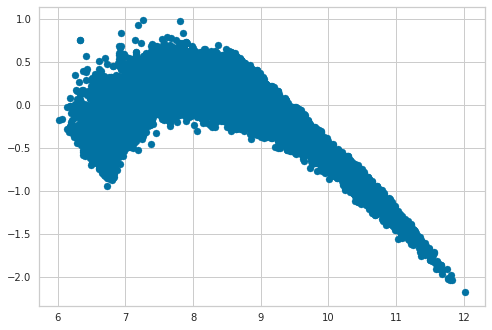

In [46]:
plt.scatter(model_1.fittedvalues, model_1.resid)
plt.show()

### But still significant heteroscadasticity

In [47]:
bp_test = het_breuschpagan(model_1.resid, model_1.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 8295.880109158436, 'LM-Test p-value': 0.0}


# NORMALITY

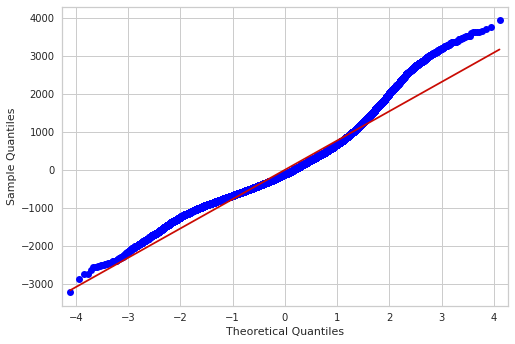

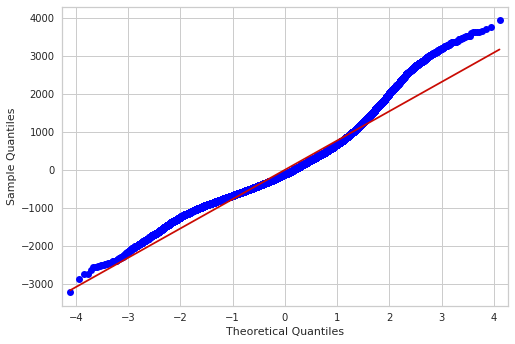

In [48]:
sm.qqplot(model.resid , line='s')

### Not-normal after ln transformation on y

In [49]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 2.300e+04
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:02:24   Log-Likelihood:                -11360.
No. Observations:               50679   AIC:                         2.276e+04
Df Residuals:                   50658   BIC:                         2.295e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.3291      0.107     49.952      0.000       5.120       5.538
cut[T.Good]          0.0207      0.010      2.028      0.043       0.001       0.041
cut[T.Ideal]         0.0645      0.010      6.320      0.000       0.045       0.085
cut[T.Premium]       0.0151      0.010      1.522      0.128      -0.004       0.035
cut[T.Very Good]     0.0198      0.010      2.002      0.045       0.000       0.039
color[T.E]          -0.0515      0.005    -10.451      0.000      -0.061      -0.042
color[T.F]          -0.0539      0.005    -10.787      0.000      -0.064      -0.044
color[T.G]          -0.1165      0.005    -23.785      0.000      -0.126      -0.107
color[T.H]          -0.2514      0.005    -48.247      0.000      -0.262      -0.241
color[T.I]          -0.4063      0.006    -69.092      0.000      -0.418      -0.395
color[T.J]          -0.5810      0.007    -78.264      0.000      -0.596      -0.566
clarity[T.IF]        0.6384      0.018     34.784      0.000       0.602       0.674
clarity[T.SI1]       0.3535      0.017     21.017      0.000       0.320       0.386
clarity[T.SI2]       0.1732      0.017     10.237      0.000       0.140       0.206
clarity[T.VS1]       0.5190      0.017     30.556      0.000       0.486       0.552
clarity[T.VS2]       0.4547      0.017     26.979      0.000       0.422       0.488
clarity[T.VVS1]      0.5715      0.017     32.695      0.000       0.537       0.606
clarity[T.VVS2]      0.5538      0.017     32.112      0.000       0.520       0.588
carat                2.3258      0.004    631.484      0.000       2.319       2.333
depth            -6.768e-05      0.001     -0.058      0.954      -0.002       0.002
table                0.0058      0.001      7.031      0.000       0.004       0.007
==============================================================================
Omnibus:                     9706.478   Durbin-Watson:                   0.444
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23630.342
Skew:                          -1.072   Prob(JB):                         0.00
Kurtosis:                       5.569   Cond. No.                     6.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

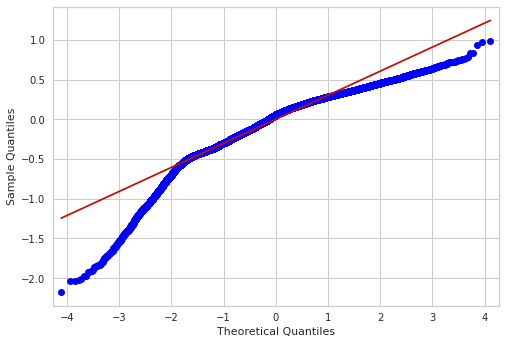

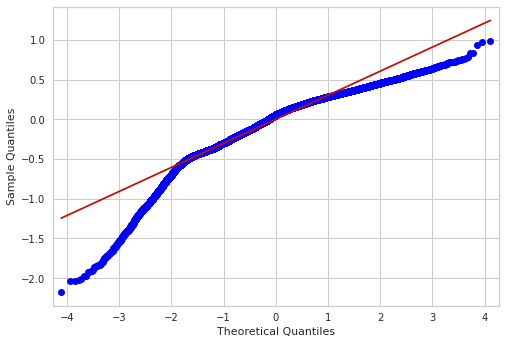

In [50]:
sm.qqplot(model_1.resid, line='s')

### Check nonlinearity between each predictor

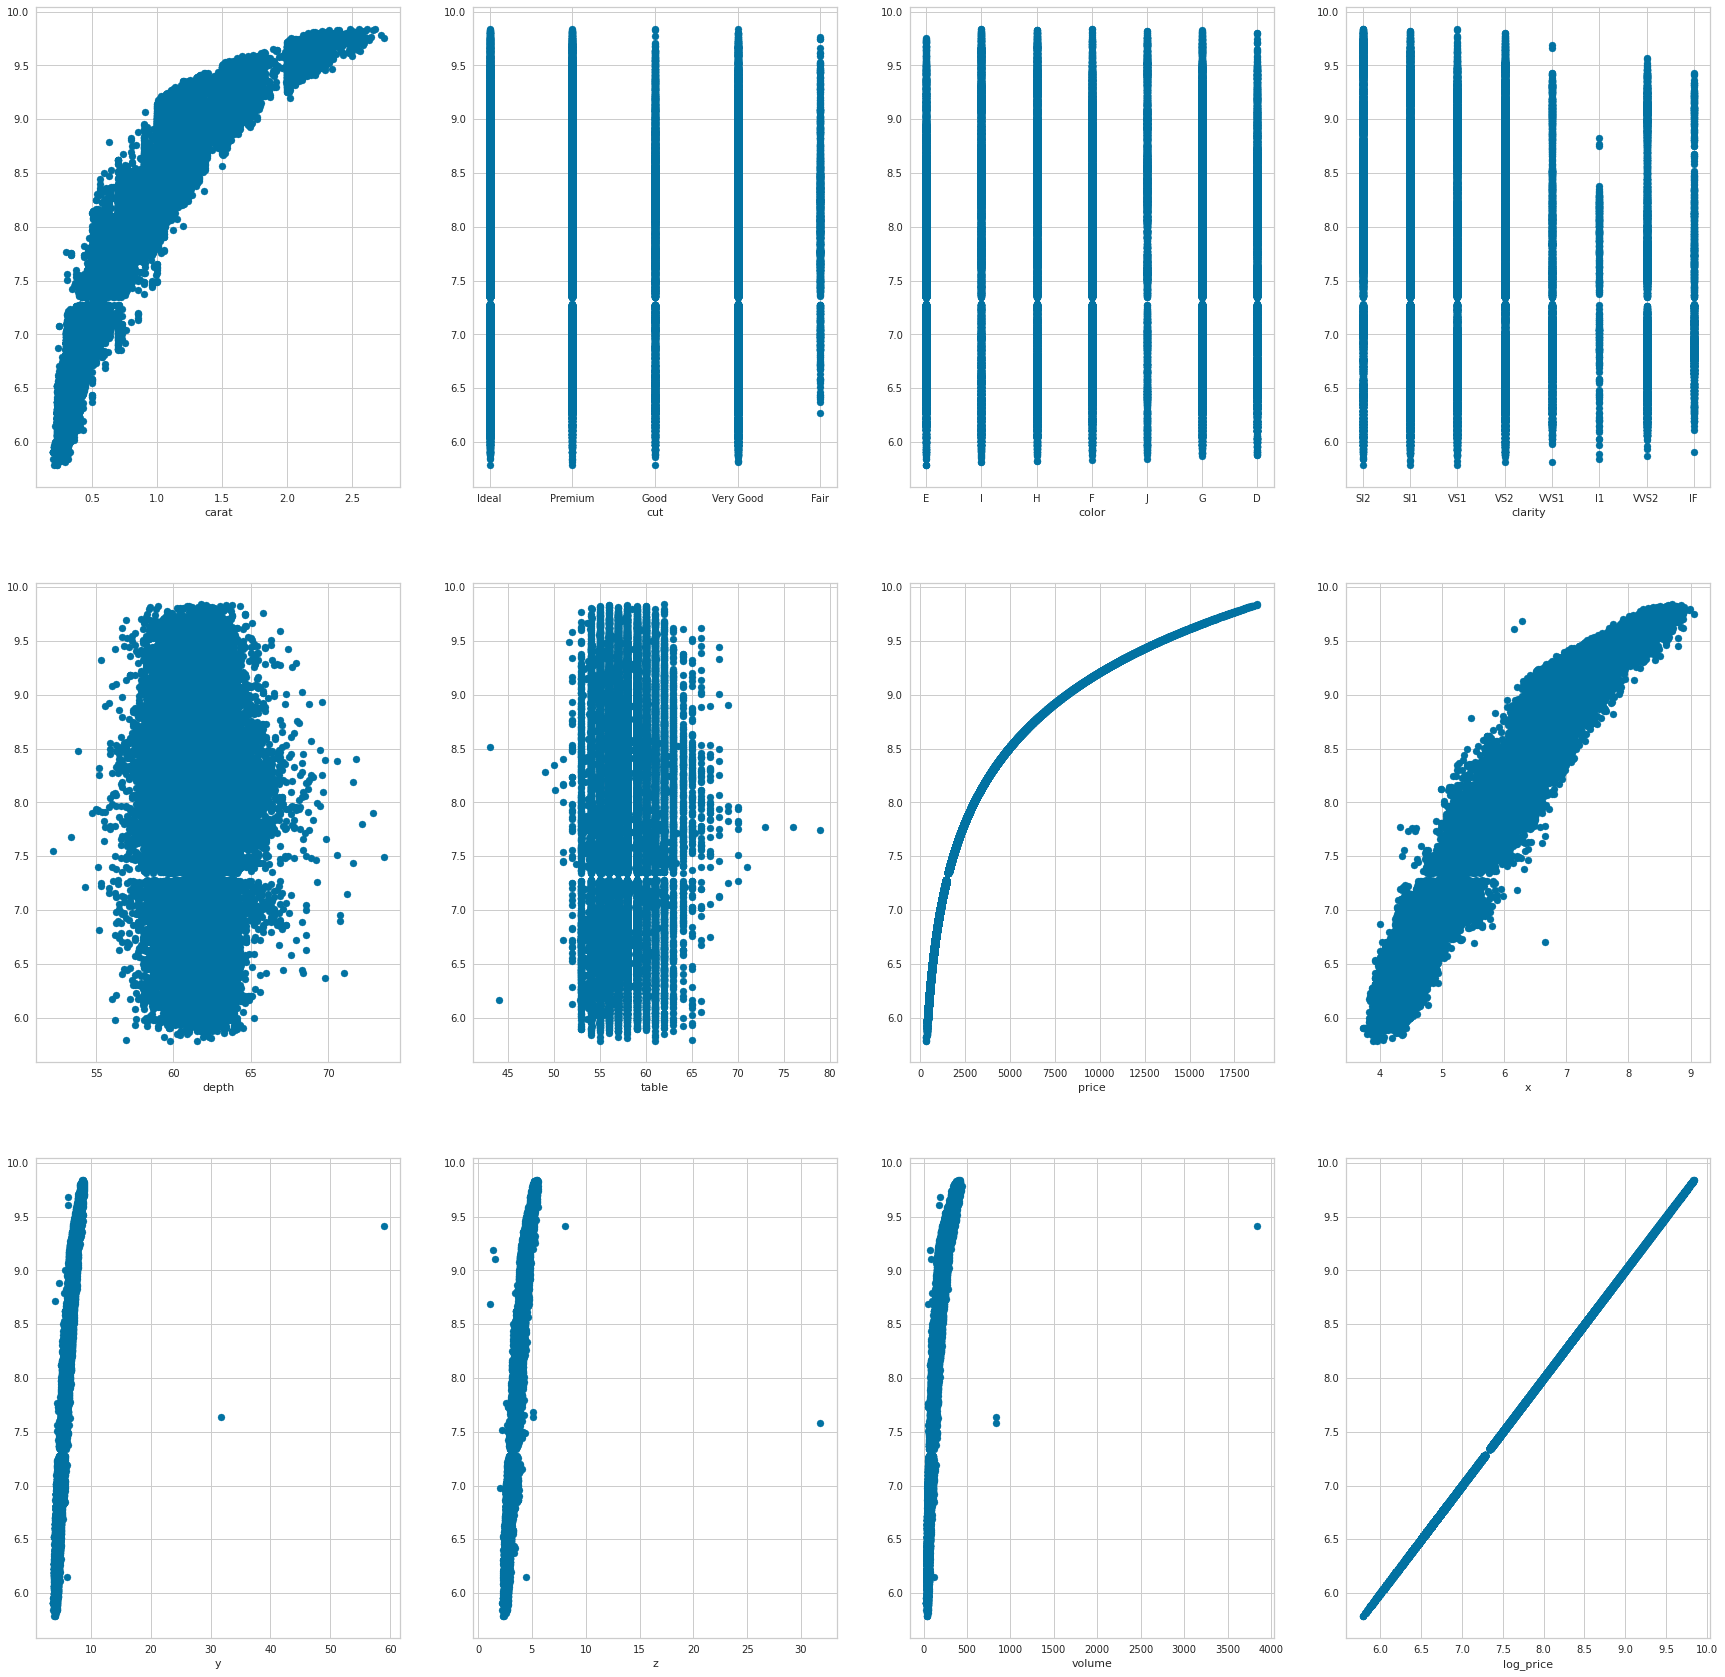

In [51]:
# Nonlinearity beween y and x
#pair-wise scatter plot between y and predictors

fig, axes = plt.subplots(3,4, figsize=(30, 30))

# i: index
for i, ax in enumerate(axes.flatten()):
    ax.scatter(diamonds[diamonds.columns[i]], diamonds['log_price'])
    ax.set_xlabel(diamonds.columns[i])
#

### Try to ln transform carat

In [52]:
diamonds['log_carat']=np.log(diamonds['carat'])

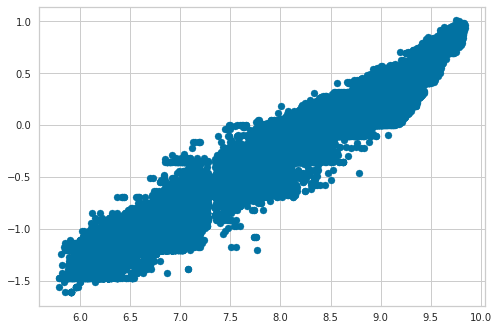

In [53]:
plt.scatter(diamonds['log_price'], diamonds['log_carat'])

In [54]:
model_2 = smf.ols('log_price ~ log_carat + cut + color + clarity + depth + table', data = diamonds).fit()


In [55]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.437e+05
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:02:29   Log-Likelihood:                 32863.
No. Observations:               50679   AIC:                        -6.568e+04
Df Residuals:                   50658   BIC:                        -6.550e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.9879      0.045    178.821      0.000       7.900       8.075
cut[T.Good]          0.0936      0.004     21.910      0.000       0.085       0.102
cut[T.Ideal]         0.1732      0.004     40.584      0.000       0.165       0.182
cut[T.Premium]       0.1523      0.004     36.755      0.000       0.144       0.160
cut[T.Very Good]     0.1279      0.004     30.977      0.000       0.120       0.136
color[T.E]          -0.0513      0.002    -24.921      0.000      -0.055      -0.047
color[T.F]          -0.0919      0.002    -43.971      0.000      -0.096      -0.088
color[T.G]          -0.1479      0.002    -72.194      0.000      -0.152      -0.144
color[T.H]          -0.2373      0.002   -109.240      0.000      -0.242      -0.233
color[T.I]          -0.3579      0.002   -146.383      0.000      -0.363      -0.353
color[T.J]          -0.4946      0.003   -160.658      0.000      -0.501      -0.489
clarity[T.IF]        0.9684      0.008    126.021      0.000       0.953       0.984
clarity[T.SI1]       0.4728      0.007     67.282      0.000       0.459       0.487
clarity[T.SI2]       0.3217      0.007     45.524      0.000       0.308       0.336
clarity[T.VS1]       0.6851      0.007     96.478      0.000       0.671       0.699
clarity[T.VS2]       0.6175      0.007     87.650      0.000       0.604       0.631
clarity[T.VVS1]      0.8820      0.007    120.529      0.000       0.868       0.896
clarity[T.VVS2]      0.8119      0.007    112.528      0.000       0.798       0.826
log_carat            1.8738      0.001   1588.509      0.000       1.871       1.876
depth               -0.0003      0.000     -0.620      0.535      -0.001       0.001
table               -0.0003      0.000     -0.848      0.397      -0.001       0.000
==============================================================================
Omnibus:                     1171.442   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2158.711
Skew:                           0.178   Prob(JB):                         0.00
Kurtosis:                       3.946   Cond. No.                     6.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

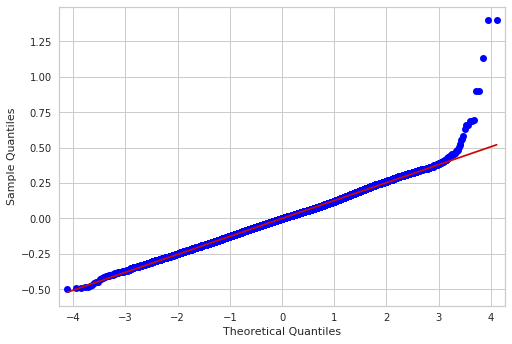

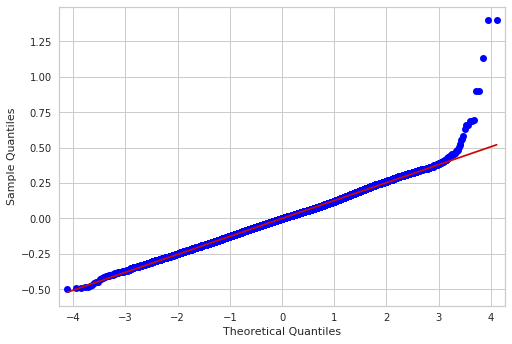

In [56]:
sm.qqplot(model_2.resid, line='s')

### Check residual vs fitted value again

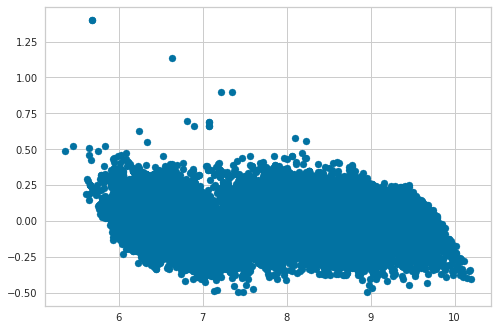

In [57]:
plt.scatter(model_2.fittedvalues, model_2.resid)
plt.show()

In [58]:
bp_test = het_breuschpagan(model_2.resid, model_2.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 1219.63783275648, 'LM-Test p-value': 4.704366557324846e-246}


# Calculate robust standard errors using class supplementary material

In [59]:
model_x = smf.ols('log_price ~ log_carat + cut + color + clarity + depth + table', data = diamonds).fit()


In [60]:
B = model_x.params
diag_e2 = np.diag(model_x.resid**2)
diamonds['b'] = 1
dummy_coded = pd.get_dummies(diamonds)[['b', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2', 'log_carat', 'depth', 'table']]
X = dummy_coded.to_numpy()
inverse = np.linalg.inv(X.T@X)

In [61]:
robust_std = inverse@X.T@diag_e2@X@inverse
sqrt_robust = np.diagonal(robust_std)**0.5

In [62]:
for i, b in enumerate(B):
    print(b/sqrt_robust[i], stats.t.sf(np.abs(b/sqrt_robust[i]), diamonds.shape[0]-1)*2)

181.30074502197633 0.0
22.897748798813222 1.8909275787494505e-115
42.08125686758089 0.0
38.232701806810184 0.0
32.37250634444017 1.4157982613349565e-227
-23.598645066834305 1.827322783454561e-122
-42.05276932184878 0.0
-69.07491706833386 0.0
-106.72579524248695 0.0
-142.78922615911728 0.0
-156.17722703498114 0.0
109.39330839989378 0.0
57.682152964128456 0.0
39.054798977232274 0.0
82.9143255471999 0.0
75.15068576234087 0.0
103.42970667832782 0.0
96.273640022135 0.0
1455.8069199074273 0.0
-0.6330604853923485 0.5266970016779121
-0.8698460117107912 0.38438868257810854


# Getting statsmodels to use robust standard errors for summary

In [63]:
model_3 = smf.ols('log_price ~ log_carat + cut + color + clarity + depth + table', data = diamonds).fit(cov_type='HC0', use_t=True)
model_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.282e+05
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:02:43   Log-Likelihood:                 32863.
No. Observations:               50679   AIC:                        -6.568e+04
Df Residuals:                   50658   BIC:                        -6.550e+04
Df Model:                          20                                         
Covariance Type:                  HC0                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.9879      0.044    181.301      0.000       7.902       8.074
cut[T.Good]          0.0936      0.004     22.898      0.000       0.086       0.102
cut[T.Ideal]         0.1732      0.004     42.081      0.000       0.165       0.181
cut[T.Premium]       0.1523      0.004     38.233      0.000       0.144       0.160
cut[T.Very Good]     0.1279      0.004     32.373      0.000       0.120       0.136
color[T.E]          -0.0513      0.002    -23.599      0.000      -0.056      -0.047
color[T.F]          -0.0919      0.002    -42.053      0.000      -0.096      -0.088
color[T.G]          -0.1479      0.002    -69.075      0.000      -0.152      -0.144
color[T.H]          -0.2373      0.002   -106.726      0.000      -0.242      -0.233
color[T.I]          -0.3579      0.003   -142.789      0.000      -0.363      -0.353
color[T.J]          -0.4946      0.003   -156.177      0.000      -0.501      -0.488
clarity[T.IF]        0.9684      0.009    109.393      0.000       0.951       0.986
clarity[T.SI1]       0.4728      0.008     57.682      0.000       0.457       0.489
clarity[T.SI2]       0.3217      0.008     39.055      0.000       0.306       0.338
clarity[T.VS1]       0.6851      0.008     82.914      0.000       0.669       0.701
clarity[T.VS2]       0.6175      0.008     75.151      0.000       0.601       0.634
clarity[T.VVS1]      0.8820      0.009    103.430      0.000       0.865       0.899
clarity[T.VVS2]      0.8119      0.008     96.274      0.000       0.795       0.828
log_carat            1.8738      0.001   1455.807      0.000       1.871       1.876
depth               -0.0003      0.000     -0.633      0.527      -0.001       0.001
table               -0.0003      0.000     -0.870      0.384      -0.001       0.000
==============================================================================
Omnibus:                     1171.442   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2158.711
Skew:                           0.178   Prob(JB):                         0.00
Kurtosis:                       3.946   Cond. No.                     6.74e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 6.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Obtained same results

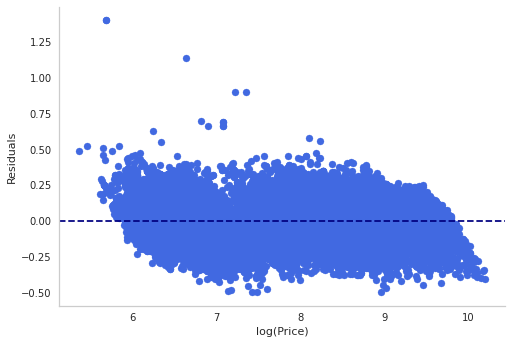

In [64]:
fig, ax = plt.subplots()
ax.scatter(model_3.fittedvalues, model_3.resid, color='royalblue')
ax.axhline(0, linestyle='dashed', color='navy')
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('log(Price)')
ax.set_ylabel('Residuals')
plt.show()

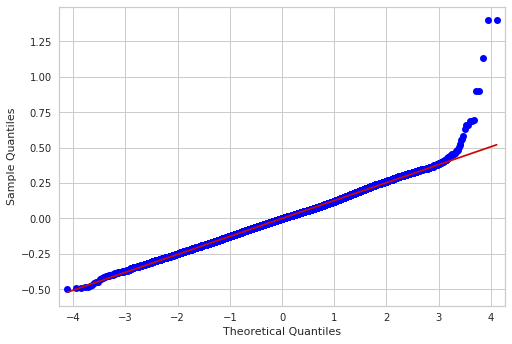

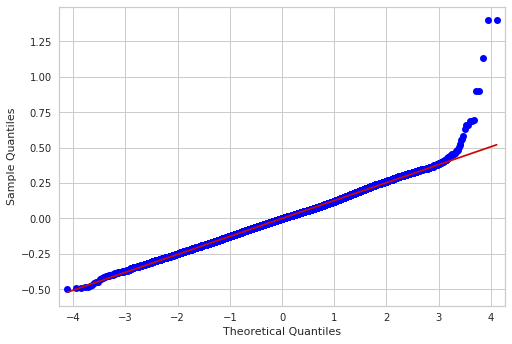

In [65]:
sm.qqplot(model_3.resid, line='s')

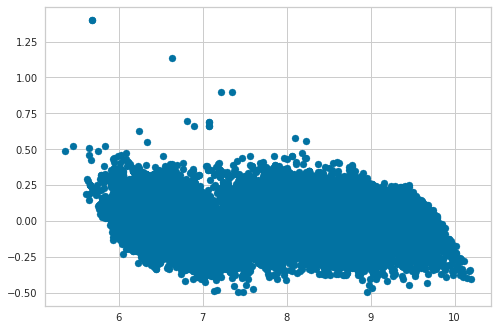

In [66]:
plt.scatter(model_3.fittedvalues, model_3.resid)
plt.show()

In [67]:
bp_test = het_breuschpagan(model_3.resid, model_3.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 1219.63783275648, 'LM-Test p-value': 4.704366557324846e-246}


## Model Choice

In [68]:
n = len(diamonds)
def mallows_cp(model, mse, k = 1):
    sse= np.sum(model.resid ** 2)
    return sse / mse - (len(model.resid) - 2 * k)

full_model_mse = np.sum(model_3.resid ** 2) / (n - 7)
ind = ['log_carat', 'cut', 'color', 'clarity','depth', 'table']
subsets = []
for i in range(1, 7):
    subsets += ['+'.join(r) for r in itertools.combinations(ind, i)]
d = {'predictors': subsets}
d['# of predictors'] = [r.count('+') + 1 for r in d['predictors']]
d["Mallow's cp"] = []
d["Adj R^2"] = []
d['AIC'] = []
d['BIC'] = []



for r, num in zip(d['predictors'], d['# of predictors']):
    model = smf.ols(f'log_price ~ {r}', diamonds).fit()
    d["Mallow's cp"].append(mallows_cp(model, full_model_mse, k=num + 1))
    d['Adj R^2'].append(model.rsquared_adj)
    d['AIC'].append(model.aic)
    d['BIC'].append(model.bic)


In [69]:

pd.DataFrame(d).sort_values(['# of predictors', 'Adj R^2'])

,predictors,# of predictors,Mallow's cp,Adj R^2,AIC,BIC
4,depth,1,2.874424e+06,4.836070e-07,139816.554457,139834.220991
1,cut,1,2.823022e+06,1.751496e-02,138924.072781,138968.239115
5,table,1,2.800315e+06,2.533591e-02,138516.034662,138533.701196
2,color,1,2.776331e+06,3.344000e-02,138097.889109,138159.721978
3,clarity,1,2.674286e+06,6.831105e-02,136236.721658,136307.387793
...,...,...,...,...,...,...
59,log_carat+cut+clarity+depth+table,5,4.675548e+04,9.666858e-01,-32568.745823,-32436.246820
60,log_carat+color+clarity+depth+table,5,2.439800e+03,9.818391e-01,-63314.330471,-63164.164934
56,log_carat+cut+color+clarity+depth,5,5.718722e+00,9.826704e-01,-65686.052502,-65509.387164
57,log_carat+cut+color+clarity+table,5,5.384841e+00,9.826705e-01,-65686.386425,-65509.721087


In [70]:
pd.DataFrame(d).sort_values(['Adj R^2'])

,predictors,# of predictors,Mallow's cp,Adj R^2,AIC,BIC
4,depth,1,2.874424e+06,4.836070e-07,139816.554457,139834.220991
13,cut+depth,2,2.823018e+06,1.749772e-02,138925.961931,138978.961532
1,cut,1,2.823022e+06,1.751496e-02,138924.072781,138968.239115
5,table,1,2.800315e+06,2.533591e-02,138516.034662,138533.701196
20,depth+table,2,2.791560e+06,2.831054e-02,138362.128261,138388.628061
...,...,...,...,...,...,...
60,log_carat+color+clarity+depth+table,5,2.439800e+03,9.818391e-01,-63314.330471,-63164.164934
62,log_carat+cut+color+clarity+depth+table,6,7.000000e+00,9.826703e-01,-65684.771318,-65499.272713
56,log_carat+cut+color+clarity+depth,5,5.718722e+00,9.826704e-01,-65686.052502,-65509.387164
57,log_carat+cut+color+clarity+table,5,5.384841e+00,9.826705e-01,-65686.386425,-65509.721087


In [71]:
final_model = smf.ols(f'log_price ~ log_carat+cut+color+clarity', diamonds).fit(cov_type='HC0')

In [72]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.424e+05
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:03:11   Log-Likelihood:                 32863.
No. Observations:               50679   AIC:                        -6.569e+04
Df Residuals:                   50660   BIC:                        -6.552e+04
Df Model:                          18                                         
Covariance Type:                  HC0                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.9511      0.009    889.489      0.000       7.934       7.969
cut[T.Good]          0.0942      0.004     23.497      0.000       0.086       0.102
cut[T.Ideal]         0.1748      0.004     46.963      0.000       0.168       0.182
cut[T.Premium]       0.1532      0.004     40.751      0.000       0.146       0.161
cut[T.Very Good]     0.1289      0.004     34.293      0.000       0.122       0.136
color[T.E]          -0.0513      0.002    -23.602      0.000      -0.056      -0.047
color[T.F]          -0.0919      0.002    -42.048      0.000      -0.096      -0.088
color[T.G]          -0.1479      0.002    -69.102      0.000      -0.152      -0.144
color[T.H]          -0.2373      0.002   -106.772      0.000      -0.242      -0.233
color[T.I]          -0.3579      0.003   -142.836      0.000      -0.363      -0.353
color[T.J]          -0.4947      0.003   -156.240      0.000      -0.501      -0.488
clarity[T.IF]        0.9687      0.009    109.452      0.000       0.951       0.986
clarity[T.SI1]       0.4730      0.008     57.682      0.000       0.457       0.489
clarity[T.SI2]       0.3218      0.008     39.063      0.000       0.306       0.338
clarity[T.VS1]       0.6853      0.008     82.935      0.000       0.669       0.701
clarity[T.VS2]       0.6176      0.008     75.158      0.000       0.602       0.634
clarity[T.VVS1]      0.8822      0.009    103.460      0.000       0.865       0.899
clarity[T.VVS2]      0.8120      0.008     96.287      0.000       0.796       0.829
log_carat            1.8737      0.001   1464.200      0.000       1.871       1.876
==============================================================================
Omnibus:                     1170.580   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2156.261
Skew:                           0.178   Prob(JB):                         0.00
Kurtosis:                       3.945   Cond. No.                         47.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [73]:
diamonds['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS1', 'I1', 'VVS2', 'IF'],
      dtype=object)